### Antibiotic Histogram Plotter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import os

if not os.path.exists("Figures"):
    os.makedirs("Figures")

In [2]:
sim_MEs = [2,4,6,7]#no 0
sim_size = len(sim_MEs)

In [3]:
data = [np.genfromtxt("ANT/ant_"+str(me)+"edges_watts_dist",delimiter="\t") for me in sim_MEs]
for i in range(len(data)): 
    for j in range(len(data[i])):
        for k in range(len(data[i][j])):
            if data[i][j][k]<0:
                data[i][j][k] = 0  

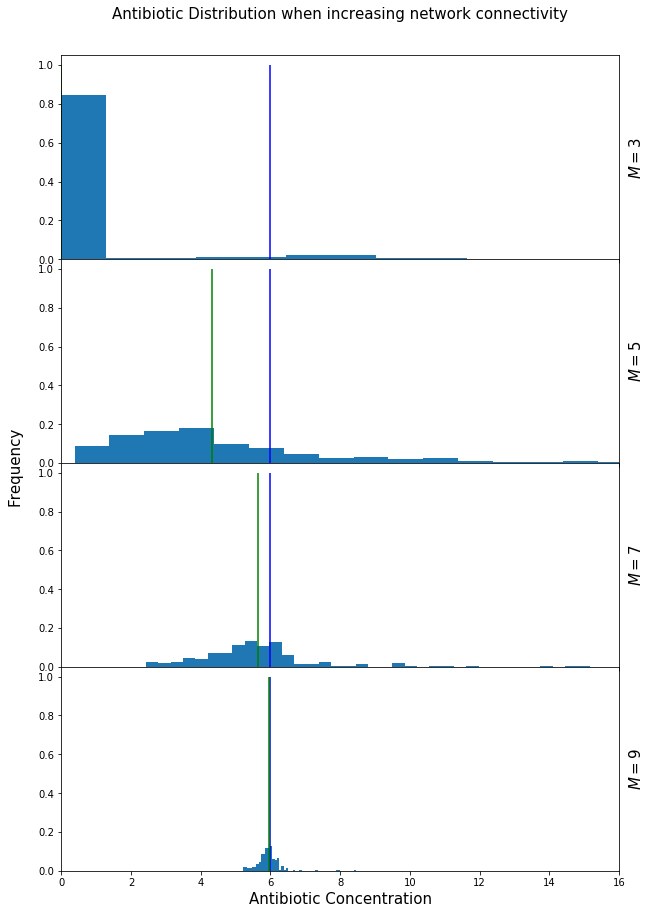

In [4]:
fontsize=15
f, ax_vec = plt.subplots(sim_size, sharex=True, sharey=False, figsize=(10,15))

for i in range(sim_size):
    ax = ax_vec[i]
    #ax.hist([j for j in data[i]], 50, normed=1, facecolor='blue', alpha=0.75)    

    results, edges = np.histogram([j for j in data[i]],normed=True,bins=50)
    binWidth = edges[1] - edges[0]
    ax.bar(edges[:-1], results*binWidth, binWidth)
    
    ax.annotate(r'$M=%d$' % (sim_MEs[i]), xy=(1.03,0.5), rotation=90,
                        ha='center',va='center',xycoords='axes fraction', fontsize=fontsize)
    
    ax.vlines([np.mean([j for j in data[i]]),np.median([j for j in data[i]])],ymin=0,ymax=1,colors=['b','g'])

    if i==0:
        ax.set_title('Antibiotic Distribution when increasing network connectivity',y=1.15,fontsize=fontsize)
    else:
        ax.yaxis.get_offset_text().set_visible(False)
    
plt.xlim([0,16])
f.subplots_adjust(wspace=0,hspace=0)
plt.xlabel("Antibiotic Concentration",fontsize=fontsize)
f.text(0.05, 0.5, 'Frequency', va='center', rotation='vertical',fontsize = fontsize)


plt.savefig("Figures/Antibiotic_Distributions.png")
plt.show()